In [96]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from gensim.models import doc2vec

%matplotlib inline

columns = ['song','year','artist','genre','text']
df = pd.read_csv('lyrics.csv', header=0, names=columns)
df.head()

,song,year,artist,genre,text
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [98]:
import gensim

def read_corpus(df):
    for ind, line in enumerate(df.values):
        if ind > 100000:
            break

        song = line[0]
        artist = line[2]
        genre = line[3]
        text = line[4]
        
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(str(text)), [genre])                
                
train_corpus = list(read_corpus(df))
train_corpus[0]

TaggedDocument(words=['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'gonna', 'cut', 'right', 'to', 'the', 'chase', 'some', 'women', 'were', 'made', 'but', 'me', 'myself', 'like', 'to', 'think', 'that', 'was', 'created', 'for', 'special', 'purpose', 'you', 'know', 'what', 'more', 'special', 'than', 'you', 'you', 'feel', 'me', 'it', 'on', 'baby', 'let', 'get', 'lost', 'you', 'don', 'need', 'to', 'call', 'into', 'work', 'cause', 'you', 're', 'the', 'boss', 'for', 'real', 'want', 'you', 'to', 'show', 'me', 'how', 'you', 'feel', 'consider', 'myself', 'lucky', 'that', 'big', 'deal', 'why', 'well', 'you', 'got', 'the', 'key', 'to', 'my', 'heart', 'but', 'you', 'ain', 'gonna', 'need', 'it', 'rather', 'you', 'open', 'up', 'my', 'body', 'and', 'show', 'me', 'secrets', 'you', 'didn', 'know', 'was', 'inside', 'no', 'need', 'for', 'me', 'to', 'lie', 'it', 'too', 'big', 'it', 'too', 'wide', 'it', 'too', 'strong', 'it', 'won', 'fit', 'it', 'too', 'much', 'it', 'too', 'tough', 'he', 'talk', 'lik

In [99]:
%%time

model = doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model.build_vocab(train_corpus)

for epoch in range(10):
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Wall time: 25min 16s


In [100]:
model.docvecs['Pop']

array([-0.97859341,  0.68320417, -2.25249577,  0.68096924, -0.91864377,
       -1.38894677,  0.014797  ,  1.43162465,  0.97490561,  0.53819275,
        0.81262028, -2.87389922, -0.24870427, -0.15160185, -0.03499122,
       -0.77238989, -0.3308464 ,  0.97403747,  0.51397234,  0.29366127,
       -1.59627104,  1.255916  , -0.16081649,  0.70767266,  0.44380191,
       -1.80864179, -2.16579509,  2.367275  , -0.47657216, -1.3105098 ,
        1.59055245,  0.93348914,  0.31642449,  0.45463517, -0.51713723,
       -0.81305218, -0.83365327, -0.05626555, -0.37759754, -0.33589193,
       -0.72735131, -0.93541187, -0.10189498,  0.43573251,  0.48052096,
        0.00655429,  0.66151297,  2.2545979 , -1.93342531,  0.02021766,
        0.56387281, -0.39414155,  0.66860026,  0.48133704, -0.39689934,
       -0.44297192, -0.77833718, -1.20578456, -0.2530556 ,  0.88426322,
        0.0127876 , -2.16585493, -0.56025004, -1.2356894 , -1.14460588,
       -0.72645831,  0.14069232,  0.84371036, -1.13147891,  0.39

In [104]:
song = model.docvecs['Pop']
model.docvecs.most_similar([song], topn=5)


[('Pop', 1.0),
 ('Other', 0.5169467926025391),
 ('Indie', 0.49581027030944824),
 ('Not Available', 0.4553647041320801),
 ('Jazz', 0.41597914695739746)]

In [105]:
genre_df = pd.DataFrame(model.docvecs.doctag_syn0)
genre_df['genre'] = model.docvecs.offset2doctag
genre_df

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,genre
0,-0.978593,0.683204,-2.252496,0.680969,-0.918644,-1.388947,0.014797,1.431625,0.974906,0.538193,...,1.131094,0.109475,0.311155,-0.369160,0.504167,-0.136562,-0.127106,0.239008,-0.261328,Pop
1,0.210956,0.681925,0.897667,1.092010,-1.842114,-0.054887,0.889028,-2.449236,2.654665,0.392278,...,2.445947,1.815898,0.484644,0.504829,-1.853120,0.564279,0.033163,-1.288321,-0.494229,Hip-Hop
2,0.467273,0.671412,0.480240,0.512873,-0.183193,-1.711244,0.165171,0.659495,0.335226,0.146874,...,1.076468,-0.815735,0.641237,-0.788996,0.685470,0.229685,1.240824,-0.047565,0.735237,Not Available
3,-0.163178,0.858132,0.279929,1.188757,-0.129857,-0.425253,0.945612,-0.050594,0.038884,0.840494,...,0.761759,0.883122,-0.573507,-0.907107,-0.312498,0.037523,0.404190,-1.291529,-0.374126,Other
4,-0.661434,1.372829,-0.714710,0.787713,0.213731,1.109245,-0.642445,1.443471,1.643263,0.387197,...,-0.767250,-1.231226,0.561116,-0.061589,1.306454,-0.571830,-0.717844,2.023325,-0.362677,Rock
5,-0.201568,0.311524,0.609499,0.140536,-1.819959,1.671500,-1.045833,-0.023638,2.280915,0.776648,...,-0.745580,-0.547392,-0.823862,1.460588,-2.588967,0.922594,-0.602922,-0.505685,-1.114734,Metal
6,1.117447,0.998779,0.313736,-0.704808,0.832130,-0.081174,-0.418550,1.974892,-1.353958,-1.637176,...,1.338818,-0.566679,1.596798,-2.140213,1.522958,0.656894,0.848528,1.893379,1.678078,Country
7,0.485375,1.540886,0.345888,-0.195948,0.796139,-1.522388,-1.291645,0.826512,-1.193381,-0.765825,...,1.982048,1.305081,1.507534,-0.385123,1.868550,0.961856,0.468808,1.707584,1.716036,Jazz
8,-0.743342,1.234398,-0.155610,-0.202792,-0.772993,-0.727052,0.123956,0.393163,2.015593,2.285061,...,-0.573990,-0.621298,-0.428556,0.449756,-0.948333,1.530110,-0.851476,-0.572571,-0.191557,Electronic
9,1.263673,0.401991,1.111268,-0.731719,-0.598624,0.673754,-0.101510,0.591068,0.375914,0.143773,...,0.474043,-0.722702,1.474750,-0.187668,1.611592,1.404245,0.713354,2.883498,0.824086,Folk


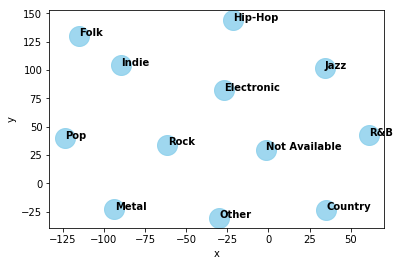

In [106]:
tsne = TSNE(n_components=2)
t = tsne.fit_transform(genre_df.drop('genre', axis=1))

df = pd.DataFrame(t, columns=['x','y'])
df['group'] = genre_df['genre']

p1 = sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0, df.shape[0]):
    p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

# view the graph
p1


In [92]:
df

,x,y,group
0,-734.761902,160.393417,Pop
1,-91.842941,-178.612915,Hip-Hop
2,-526.117432,-291.104431,Not Available
3,-325.781097,128.639603,Other
4,606.403687,75.074944,Rock
5,-37.553013,384.605042,Metal
6,391.881897,507.513519,Country
7,195.476532,78.659294,Jazz
8,342.007996,-346.660431,Electronic
9,-16.753824,794.031128,Folk


In [15]:
for ind, doc in enumerate(train_corpus):
    if ind > 5:
        break
    print('Original Sentence {}\n'.format(' '.join(doc.words)))
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=2)
    rank = [docid for docid, sim in sims]#.index(doc_id)
    
    for i in rank:
        print('Match: {}\n'.format(' '.join(train_corpus[i].words)))

Original Sentence look at her face it wonderful face and it means something special to me look at the way that she smiles when she sees me how lucky can one fellow be she just my kind of girl she makes me feel fine who could ever believe that she could be mine she just my kind of girl without her blue and if she ever leaves me what could do what could do and when we go for walk in the park and she holds me and squeezes my hand we ll go on walking for hours and talking about all the things that we plan she just my kind of girl she makes me feel fine who could ever believe that she could be mine she just my kind of girl without her blue and if she ever leaves me what could do what could do



NameError: name 'doc_id' is not defined